In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

## Missing Values

#### All the missing values are present during the interval of 1 am to 2 am on the last day of March due to the clocks going forward 1 hour because of British Standard Time (BST). These NaN values are filled using various interpolation methods.

In [4]:
# Import full data
missing_values_data = pd.read_csv("March2024.csv")

missing_values_data.isna().sum()

AnonymisedMPRN        0
Tariff                0
Product Name          0
Product Code          0
ReadingDate           0
00:00:00              0
00:30:00              0
01:00:00          43693
01:30:00          43693
02:00:00              0
02:30:00              0
03:00:00              0
03:30:00              0
04:00:00              0
04:30:00              0
05:00:00              0
05:30:00              0
06:00:00              0
06:30:00              0
07:00:00              0
07:30:00              0
08:00:00              0
08:30:00              0
09:00:00              0
09:30:00              0
10:00:00              0
10:30:00              0
11:00:00              0
11:30:00              0
12:00:00              0
12:30:00              0
13:00:00              0
13:30:00              0
14:00:00              0
14:30:00              0
15:00:00              0
15:30:00              0
16:00:00              0
16:30:00              0
17:00:00              0
17:30:00              0
18:00:00        

<Axes: >

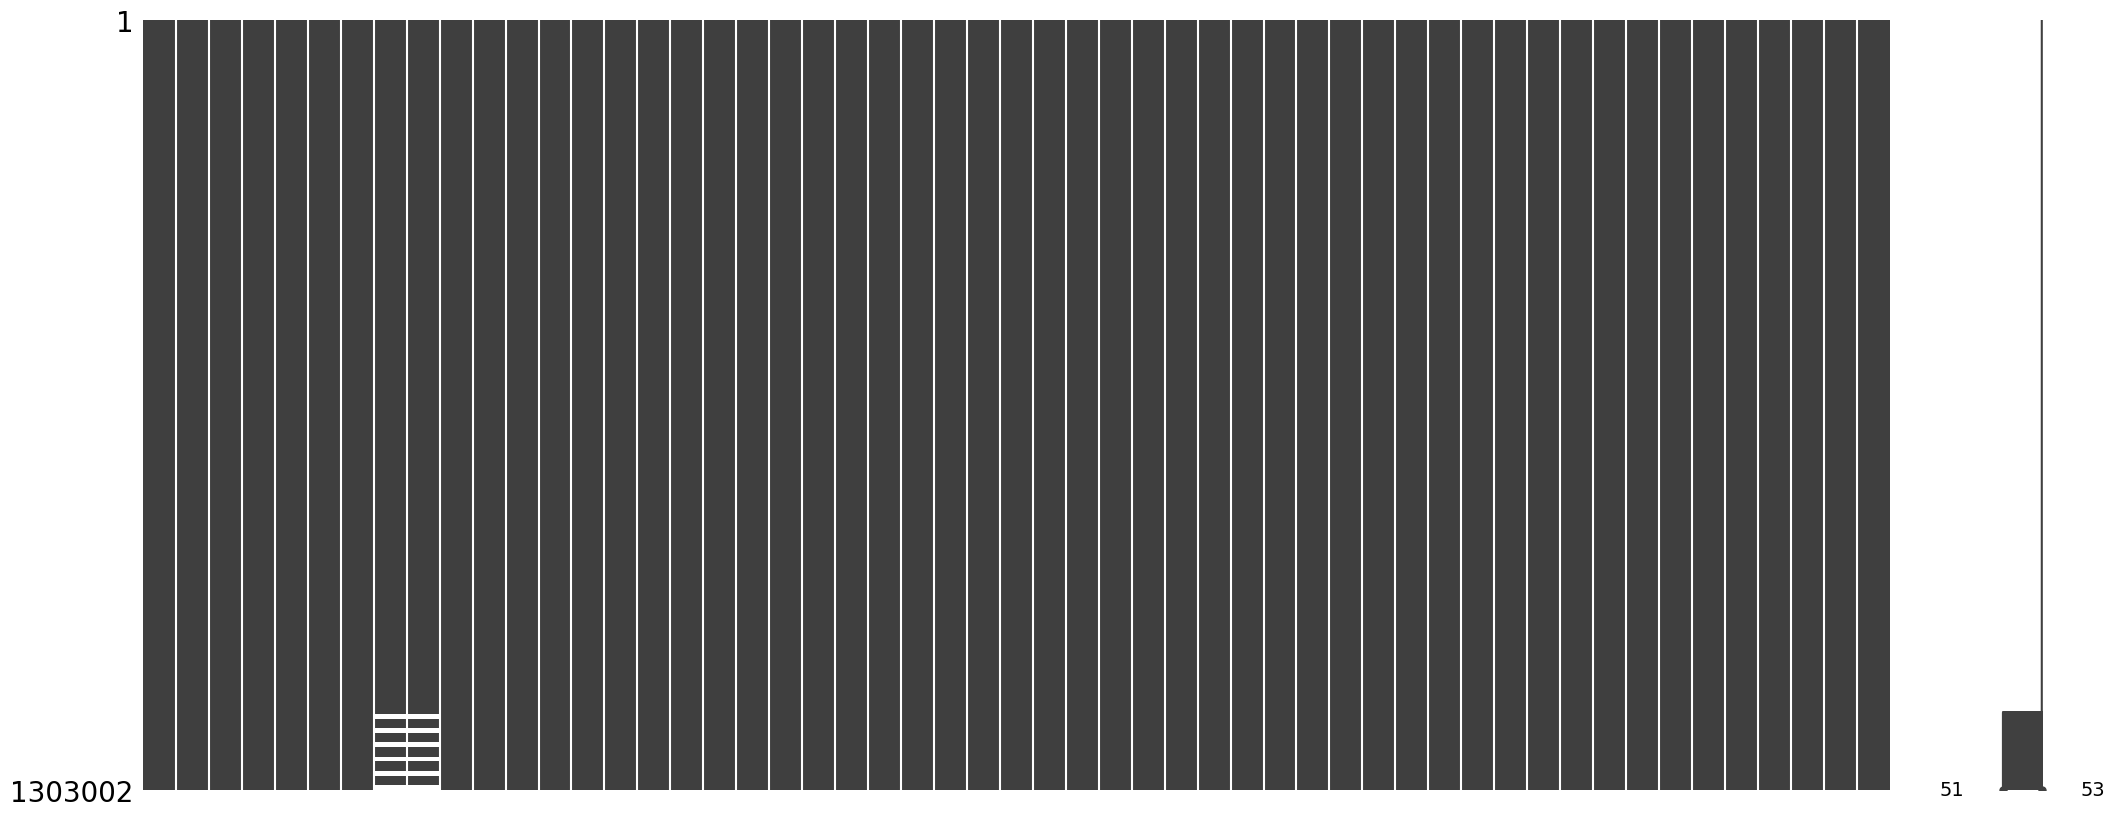

In [7]:
# Missing values visualization using missingno library
msno.matrix(missing_values_data)

In [8]:
# Checking for the number of missing values on the last day of March
missing_values_data[missing_values_data["ReadingDate"] == "2024-03-31 00:00:00.000"].isna().sum()

AnonymisedMPRN        0
Tariff                0
Product Name          0
Product Code          0
ReadingDate           0
00:00:00              0
00:30:00              0
01:00:00          43693
01:30:00          43693
02:00:00              0
02:30:00              0
03:00:00              0
03:30:00              0
04:00:00              0
04:30:00              0
05:00:00              0
05:30:00              0
06:00:00              0
06:30:00              0
07:00:00              0
07:30:00              0
08:00:00              0
08:30:00              0
09:00:00              0
09:30:00              0
10:00:00              0
10:30:00              0
11:00:00              0
11:30:00              0
12:00:00              0
12:30:00              0
13:00:00              0
13:30:00              0
14:00:00              0
14:30:00              0
15:00:00              0
15:30:00              0
16:00:00              0
16:30:00              0
17:00:00              0
17:30:00              0
18:00:00        

In [3]:
# Using sum to check if NaN values for each time interval are all on the last day
missing_values_data[missing_values_data["ReadingDate"] == "2024-03-31 00:00:00.000"].isna().sum() == missing_values_data.isna().sum()

AnonymisedMPRN    True
Tariff            True
Product Name      True
Product Code      True
ReadingDate       True
00:00:00          True
00:30:00          True
01:00:00          True
01:30:00          True
02:00:00          True
02:30:00          True
03:00:00          True
03:30:00          True
04:00:00          True
04:30:00          True
05:00:00          True
05:30:00          True
06:00:00          True
06:30:00          True
07:00:00          True
07:30:00          True
08:00:00          True
08:30:00          True
09:00:00          True
09:30:00          True
10:00:00          True
10:30:00          True
11:00:00          True
11:30:00          True
12:00:00          True
12:30:00          True
13:00:00          True
13:30:00          True
14:00:00          True
14:30:00          True
15:00:00          True
15:30:00          True
16:00:00          True
16:30:00          True
17:00:00          True
17:30:00          True
18:00:00          True
18:30:00          True
19:00:00   

In [9]:
last_day_data = missing_values_data[missing_values_data["ReadingDate"] == "2024-03-31 00:00:00.000"]

In [13]:
def interpolate_customer_data(group, method):
    """
    Interpolates missing data for a group of customer readings based on the specified method.

    Parameters:
    - group (DataFrame): A DataFrame containing electricity consumption data for a specific customer 
                         (grouped by 'AnonymisedMPRN'). The DataFrame must include a 'ReadingDate' column.
    - method (str): The interpolation method to use (e.g., 'linear', 'time', 'polynomial', etc.). 
                    This is passed to the `DataFrame.interpolate` method.

    Returns:
    - DataFrame: A DataFrame with interpolated electricity consumption data for the customer group, 
                 indexed by 'ReadingDate'.
                 
    This function is typically used with `groupby` to apply interpolation to each customer group.
    """
    group = group.set_index('ReadingDate')
    return group.interpolate(method).reset_index()

In [16]:
def comparisonPlot(interpolated_data, missing_data, last_day_data):
    """
    Plots the mean electricity consumption for different time intervals.

    Parameters:
    - interpolated_data (DataFrame or None): DataFrame containing imputed (interpolated) electricity consumption data. 
                                              If None, this plot is skipped.
    - missing_data (DataFrame): DataFrame containing electricity consumption data with missing values for some days.
    - last_day_data (DataFrame): DataFrame containing electricity consumption data for the last day (e.g., '2024-03-31').

    The function generates a plot comparing the mean consumption across different time intervals 
    for the interpolated data (if provided), the last day's data, and the data with missing values.
    """
    if interpolated_data is not None:
        plt.plot(interpolated_data.describe().iloc[1, 2:], label = "Imputed")
    
    plt.plot(last_day_data.describe().iloc[1, 2:], label = "2024-03-31")
    plt.plot(missing_data.describe().iloc[1, 2:], label = "Other days")
    plt.xticks(rotation=90)
    plt.title('Mean of Electricity Consumption for Each Time Interval')
    plt.xlabel('Time Interval')
    plt.ylabel('Consumption')
    plt.legend()
    plt.tight_layout()
    plt.show()

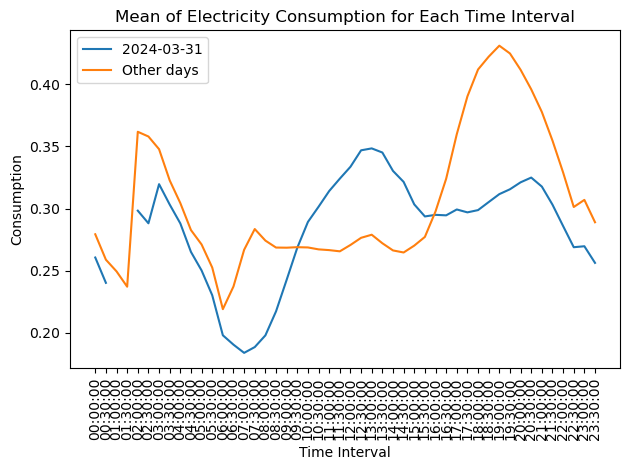

In [17]:
#Initial comparison to look at the missing data intervals and the pattern of data for the same intervals on other days
comparisonPlot(None, missing_values_data, last_day_data)

## Linear Interpolation Method

In [14]:
# Sort the data by AnonymisedMPRN and Reading date
missing_values_data = missing_values_data.sort_values(by = ['AnonymisedMPRN', 'ReadingDate'])

# Apply the interpolation function
df_interpolated_linear = missing_values_data.groupby('AnonymisedMPRN').apply(interpolate_customer_data, 'linear').reset_index(drop=True)


last_day_interpolated_linear = df_interpolated_linear[df_interpolated_linear["ReadingDate"] == "2024-03-31 00:00:00.000"]
last_day_interpolated_linear.describe()

,AnonymisedMPRN,Product Code,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
count,4.369300e+04,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,...,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000
mean,1.013332e+10,1731.850571,0.260623,0.240268,0.255063,0.243158,0.298249,0.288113,0.319547,0.303174,...,0.311542,0.315448,0.321029,0.324844,0.317610,0.303090,0.285891,0.268899,0.269673,0.256316
std,1.127879e+08,193.546006,0.505564,0.491762,0.547117,0.533587,0.657965,0.664200,0.748783,0.726892,...,0.441331,0.437518,0.429665,0.430109,0.419767,0.402295,0.388665,0.376670,0.432215,0.447491
min,1.003935e+10,254.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.005378e+10,1741.000000,0.056000,0.052000,0.051000,0.049000,0.050500,0.048000,0.046500,0.045500,...,0.063500,0.070000,0.079000,0.085000,0.088000,0.087000,0.083500,0.078000,0.070500,0.063500
50%,1.006120e+10,1742.000000,0.111000,0.098500,0.094000,0.088000,0.093500,0.087500,0.083500,0.080500,...,0.153000,0.163000,0.178000,0.187500,0.188000,0.182000,0.172500,0.160000,0.146000,0.128500
75%,1.029435e+10,1798.000000,0.234500,0.205500,0.198000,0.185000,0.204000,0.188500,0.180500,0.170000,...,0.367000,0.373500,0.381500,0.382500,0.371500,0.349000,0.326000,0.303000,0.283500,0.258000
max,1.030331e+10,2347.000000,7.396500,7.819500,6.507000,6.762000,8.027000,8.488000,8.070000,8.769000,...,8.168000,5.829000,7.608000,7.702500,6.298500,6.466000,7.442500,6.051000,6.432000,6.109000


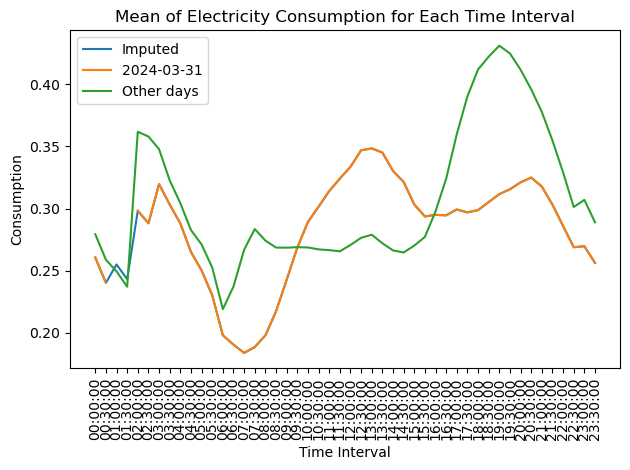

In [18]:
comparisonPlot(last_day_interpolated_linear, missing_values_data, last_day_data)

In [19]:
missing_data_copy = missing_values_data.copy()
missing_data_copy['ReadingDate'] = pd.to_datetime(missing_data_copy['ReadingDate'])
missing_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303002 entries, 189623 to 1264328
Data columns (total 53 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   AnonymisedMPRN  1303002 non-null  int64         
 1   Tariff          1303002 non-null  object        
 2   Product Name    1303002 non-null  object        
 3   Product Code    1303002 non-null  int64         
 4   ReadingDate     1303002 non-null  datetime64[ns]
 5   00:00:00        1303002 non-null  float64       
 6   00:30:00        1303002 non-null  float64       
 7   01:00:00        1259309 non-null  float64       
 8   01:30:00        1259309 non-null  float64       
 9   02:00:00        1303002 non-null  float64       
 10  02:30:00        1303002 non-null  float64       
 11  03:00:00        1303002 non-null  float64       
 12  03:30:00        1303002 non-null  float64       
 13  04:00:00        1303002 non-null  float64       
 14  04:30:00     

In [20]:
df_interpolated_time = missing_data_copy.groupby('AnonymisedMPRN').apply(interpolate_customer_data, 'time').reset_index(drop=True)
last_day_interpolated_time = df_interpolated_time[df_interpolated_time["ReadingDate"] == "2024-03-31 00:00:00.000"]
last_day_interpolated_time.describe()

,AnonymisedMPRN,Product Code,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
count,4.369300e+04,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,...,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000,43693.000000
mean,1.013332e+10,1731.850571,0.260623,0.240268,0.255063,0.243158,0.298249,0.288113,0.319547,0.303174,...,0.311542,0.315448,0.321029,0.324844,0.317610,0.303090,0.285891,0.268899,0.269673,0.256316
std,1.127879e+08,193.546006,0.505564,0.491762,0.547117,0.533587,0.657965,0.664200,0.748783,0.726892,...,0.441331,0.437518,0.429665,0.430109,0.419767,0.402295,0.388665,0.376670,0.432215,0.447491
min,1.003935e+10,254.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.005378e+10,1741.000000,0.056000,0.052000,0.051000,0.049000,0.050500,0.048000,0.046500,0.045500,...,0.063500,0.070000,0.079000,0.085000,0.088000,0.087000,0.083500,0.078000,0.070500,0.063500
50%,1.006120e+10,1742.000000,0.111000,0.098500,0.094000,0.088000,0.093500,0.087500,0.083500,0.080500,...,0.153000,0.163000,0.178000,0.187500,0.188000,0.182000,0.172500,0.160000,0.146000,0.128500
75%,1.029435e+10,1798.000000,0.234500,0.205500,0.198000,0.185000,0.204000,0.188500,0.180500,0.170000,...,0.367000,0.373500,0.381500,0.382500,0.371500,0.349000,0.326000,0.303000,0.283500,0.258000
max,1.030331e+10,2347.000000,7.396500,7.819500,6.507000,6.762000,8.027000,8.488000,8.070000,8.769000,...,8.168000,5.829000,7.608000,7.702500,6.298500,6.466000,7.442500,6.051000,6.432000,6.109000


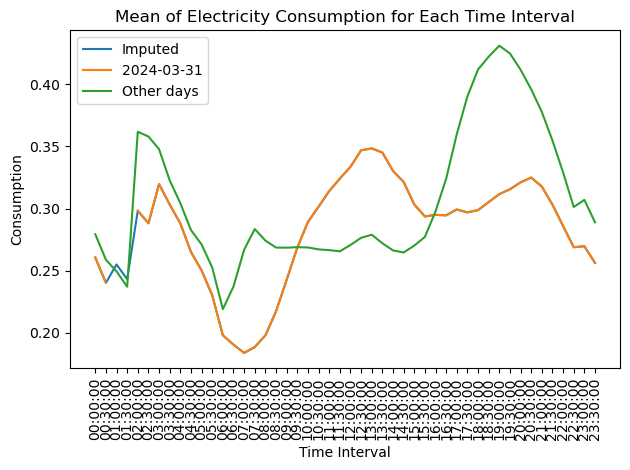

In [21]:
comparisonPlot(last_day_interpolated_time, missing_data_copy, last_day_data)

In [ ]:
df_interpolated_linear.to_csv("EnergiaData.csv", index = False)